In [ ]:
# Visit this link to learn more about dmba package
# https://pypi.org/project/dmba/
#!pip install dmba

In [ ]:
#!pip install category_encoders

In [ ]:
#!pip install dmba

In [ ]:
"""
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination
from dmba import forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
"""

In [ ]:
# === Core Python Libraries ===
import importlib
from pathlib import Path
import warnings

# === Data Manipulation and Visualization ===
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')
from pandas.plotting import parallel_coordinates

# === Statistical Analysis ===
from scipy.stats import zscore
import statsmodels.formula.api as sm
import math

# === Scikit-learn: Model Selection & Evaluation ===
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    StratifiedKFold,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.metrics import r2_score, mean_squared_error

# === Scikit-learn: Preprocessing & Utilities ===
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# === Scikit-learn: Models ===
from sklearn.linear_model import (
    BayesianRidge,
    Lasso,
    LassoCV,
    LinearRegression,
    LogisticRegression,
    Ridge,
    RidgeClassifier,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# === Imbalanced Learning ===
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# === Category Encoding ===
from category_encoders import OneHotEncoder #!pip install category_encoders

# === Miscellaneous Settings ===
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 9
predicting the price of the cars toyota crolla based on their features, we used regression model.

In [ ]:
# Visit this link to learn more about dmba package
# https://pypi.org/project/dmba/
#!pip install dmba

In [ ]:
"""
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination
from dmba import forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
"""

Colab environment detected.


In [ ]:
car = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cars.csv')

In [ ]:
car.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

In [ ]:
car.dtypes

,0
Id,int64
Model,object
Price,int64
Age_08_04,int64
Mfg_Month,int64
Mfg_Year,int64
KM,int64
Fuel_Type,object
HP,int64
Met_Color,int64


In [ ]:
# Check for missing values
car.isnull().sum()

,0
Id,0
Model,0
Price,0
Age_08_04,0
Mfg_Month,0
Mfg_Year,0
KM,0
Fuel_Type,0
HP,0
Met_Color,0


In [ ]:
# reduce data frame to the top 1000 rows and select columns for regression analysis
# car = car.iloc[0:1000]

predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Quarterly_Tax', 'Weight']

outcome = 'Price'

In [ ]:
# partition data
# we use dummy to create one hot encoding, and do the drop first to not create a Multicollinearity feature
X = pd.get_dummies(car[predictors], drop_first=True)
X.head()

y = car[outcome]
# 60% for training and 40% for test
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

<Axes: xlabel='Price', ylabel='Count'>

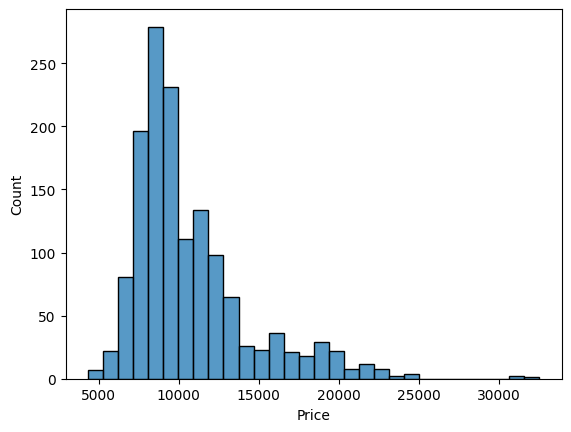

In [ ]:
sns.histplot(y, bins=30)
# Save plot
# plt.savefig("/content/drive/MyDrive/Colab Notebooks/histPrice.jpg", dpi=600)

we have the outliers over here for some columns.
Most car prices fall between \$8,000 and \$12,000, with a peak around $9,000.

The distribution is right-skewed, meaning a few cars are priced much higher (above \$20,000–30,000), but they are rare.

The long tail on the right suggests possible outliers or premium listings.

array([[<Axes: title={'center': 'KM'}>]], dtype=object)

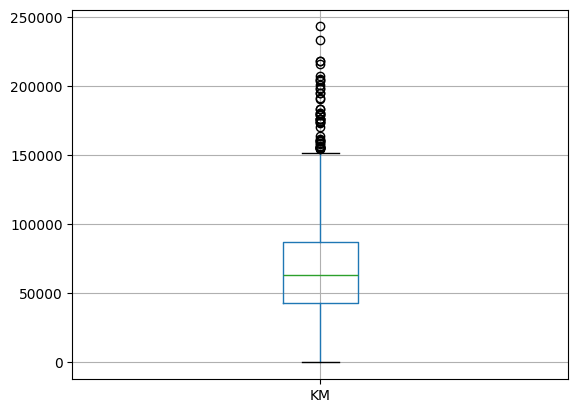

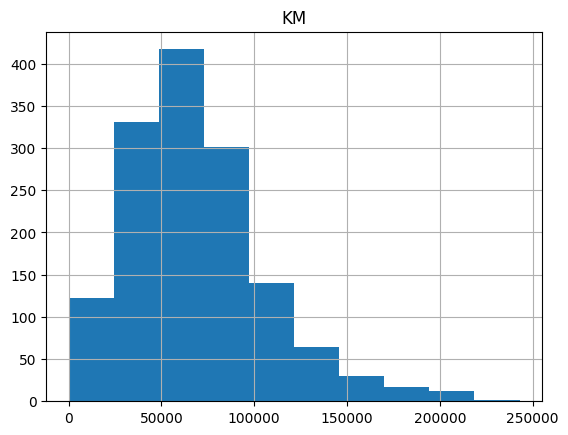

In [ ]:
# Boxplot
X.boxplot(column='KM')

# Histogram
X.hist(column='KM')

Boxplot: Most cars have mileage between 25,000 and 100,000 KM, but there are many high-mileage outliers above 150,000 KM.

Histogram: The distribution is right-skewed, meaning most cars have lower mileage, while a few have very high KM.

<Axes: >

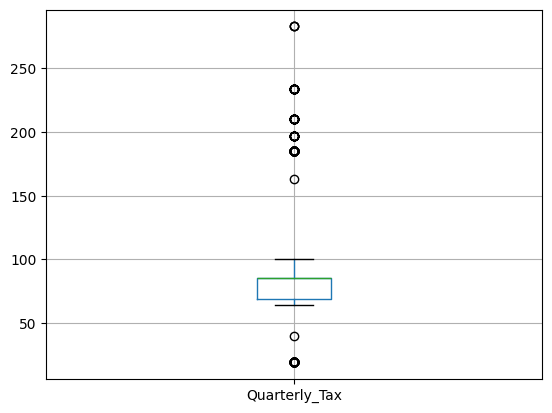

In [ ]:
# Boxplot
X.boxplot(column='Quarterly_Tax')

Most cars have a Quarterly Tax between 60 and 100 units.

There are several outliers above 150, and a few very low-taxed entries below 40.

This suggests that while most cars are in a standard tax range, some luxury or specialized vehicles may incur higher taxes.

In [ ]:
X.describe().round(2)

,Age_08_04,KM,HP,Met_Color,Automatic,cc,Doors,Quarterly_Tax,Weight
count,1436.00,1436.00,1436.00,1436.00,1436.00,1436.00,1436.00,1436.00,1436.00
mean,55.95,68533.26,101.50,0.67,0.06,1576.86,4.03,87.12,1072.46
std,18.60,37506.45,14.98,0.47,0.23,424.39,0.95,41.13,52.64
min,1.00,1.00,69.00,0.00,0.00,1300.00,2.00,19.00,1000.00
25%,44.00,43000.00,90.00,0.00,0.00,1400.00,3.00,69.00,1040.00
50%,61.00,63389.50,110.00,1.00,0.00,1600.00,4.00,85.00,1070.00
75%,70.00,87020.75,110.00,1.00,0.00,1600.00,5.00,85.00,1085.00
max,80.00,243000.00,192.00,1.00,1.00,16000.00,5.00,283.00,1615.00


# start removing outliers from here

In [ ]:
# removing outliers
from scipy.stats import zscore

# Calculate z-scores for numerical predictors only
numeric_cols = car[predictors].select_dtypes(include=['int64', 'float64']).columns
z_scores = np.abs(zscore(car[numeric_cols]))

# Set threshold (e.g., 3 = values more than 3 std deviations from the mean)
threshold = 3
no_outliers = (z_scores < threshold).all(axis=1)

# Keep only rows with all z-scores below the threshold
car_cleaned = car[no_outliers]

print(f'Number of rows and columns before removing the outliers {car.shape}')
print(f'Number of rows and columns after removing the outliers {car_cleaned.shape}')

KeyboardInterrupt: 

In [ ]:
# i wrote this part for one hot encoder
# check it out later to see how works
# one hot encoder instead of dummy thing
from sklearn.preprocessing import OneHotEncoder

# Define your predictors and outcome
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Quarterly_Tax', 'Weight']

outcome = 'Price'  # adjust to your actual target column

# Split features into categorical and numeric
categorical_features = ['Fuel_Type']
numeric_features = [col for col in predictors if col not in categorical_features]

# Column transformer to apply OneHotEncoder only to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ],
    remainder='passthrough'  # keep numeric columns as is
)

# Create a pipeline with preprocessing and linear regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Extract features and target
X = car_cleaned[predictors]
y = car_cleaned[outcome]

# Split the data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Fit the model
model.fit(train_X, train_y)

# Get encoded feature names
encoded_cols = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = np.concatenate([encoded_cols, numeric_features])

# Print coefficients
coefficients = model.named_steps['regressor'].coef_
print(pd.DataFrame({'Predictor': all_features, 'coefficient': coefficients}).round(4))

# Evaluate on training data
train_preds = model.predict(train_X)
print("R2 (Train):", r2_score(train_y, train_preds))
print("RMSE (Train):", np.sqrt(mean_squared_error(train_y, train_preds)))

           Predictor  coefficient
0   Fuel_Type_Diesel   -9454.9027
1   Fuel_Type_Petrol    2332.2822
2          Age_08_04    -120.2066
3                 KM      -0.0150
4                 HP    -136.7785
5          Met_Color     108.9975
6          Automatic       0.0000
7                 cc       9.8503
8              Doors    -113.1106
9      Quarterly_Tax       9.6930
10            Weight      28.2659
R2 (Train): 0.8640141269382482
RMSE (Train): 1116.7282075876883


R² (R-squared), also called the coefficient of determination, tells us how well your model explains the variability of the target variable.

R² = 0.864 means that 86.4% of the variation in the target (e.g., Price) is explained by your model’s predictors (Mileage, Year, Fuel_Type, etc).

R² Value	Interpretation

0.0 – 0.3	Weak model (not explaining much)

0.3 – 0.6	Moderate performance

0.6 – 0.8	Good fit

0.8 – 1.0	Very good to excellent fit



# start train test split from here

In [ ]:
# partition data
X = pd.get_dummies(car_cleaned[predictors], drop_first=True)
X.head()

y = car_cleaned[outcome]
# 60% for training and 40% for test
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# start Correlation here

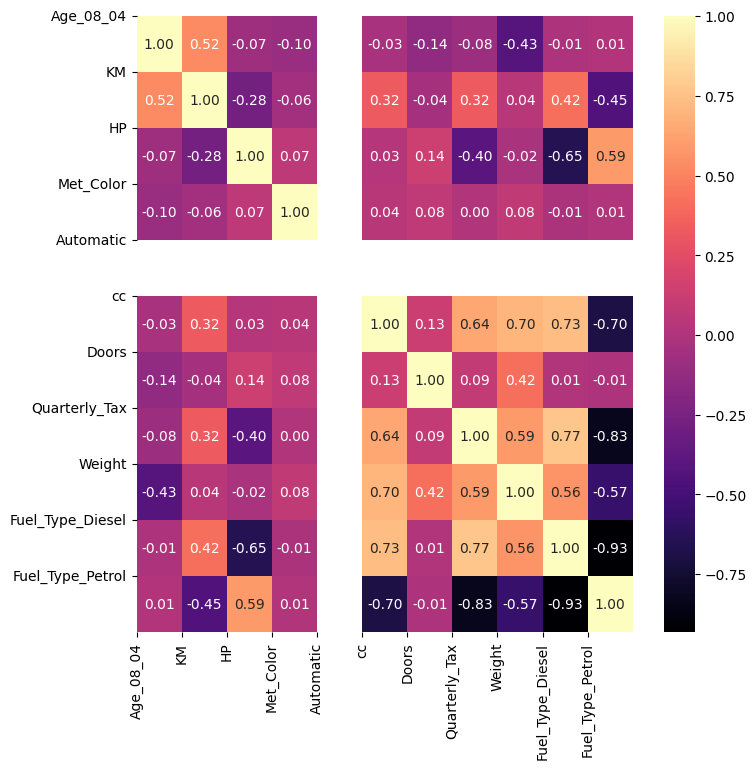

In [ ]:
corr = X.corr()

# Plot figsize
fig, ax = plt.subplots(figsize=(8, 8))

# Generate heatmap, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt='.2f')

# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns)

# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)

# Show plot
plt.show()

Objective: we divided the data on training and testing the main objective of the business case is that we need to predict the price of the used car.
Great. Now, we create a a linear regression model. And we fit the training and testing with the data. And we print the coefficients.

# LinearRegression

In [ ]:
#!pip install dmba
"""
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination
from dmba import forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
"""

car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

# print coefficients
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}).round(4))

# print performance measures (training data)
regressionSummary(train_y, car_lm.predict(train_X))

           Predictor  coefficient
0          Age_08_04    -120.2066
1                 KM      -0.0150
2                 HP    -136.7785
3          Met_Color     108.9975
4          Automatic      -0.0000
5                 cc       9.8503
6              Doors    -113.1106
7      Quarterly_Tax       9.6930
8             Weight      28.2659
9   Fuel_Type_Diesel   -9454.9027
10  Fuel_Type_Petrol    2332.2822

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1116.7282
            Mean Absolute Error (MAE) : 858.6518
          Mean Percentage Error (MPE) : -1.0648
Mean Absolute Percentage Error (MAPE) : 8.6999


### Coefficients Interpretation (Business Context)

| Predictor            | Coefficient     | Business Insight |
|----------------------|------------------|------------------|
| **Age_08_04**        | -120.21          | As the car gets older (by a month), its value drops by about **\$120** — newer cars are worth more. |
| **KM**               | -0.015           | Higher mileage slightly lowers the resale price — about **\$15 per 1,000 km**. |
| **HP**               | -136.78          | Surprisingly, more horsepower is now associated with **lower value**, possibly due to fuel cost or insurance. |
| **Met_Color**        | +108.99          | Metallic paint still adds value — **~$109 more** resale value on average. |
| **Automatic**        | ~0               | No meaningful impact from automatic transmission in this model (likely due to data cleaning or collinearity). |
| **CC**               | +9.85            | Slightly higher resale price for bigger engines — possibly indicating better performance or brand perception. |
| **Doors**            | -113.11          | More doors **reduce value**, possibly because of multicollinearity or a skew in the dataset. |
| **Quarterly_Tax**    | +9.69            | Higher tax may correlate with better car specs — slight increase in value. |
| **Weight**           | +28.27           | Heavier cars (often safer or larger) tend to be more valuable. |
| **Fuel_Type_Diesel** | -9454.90         | Diesel cars are now **worth much less** compared to the reference group — possibly due to lower demand or regulations. |
| **Fuel_Type_Petrol** | +2332.28         | Petrol cars are valued **more than the reference group**, indicating higher preference. |

---

### 📊 Model Accuracy (Validation Data)

| Metric                          | Value     | Business Interpretation |
|---------------------------------|-----------|--------------------------|
| **Mean Error (ME)**             | -0.00     | No bias — errors are centered around zero. |
| **Root Mean Squared Error (RMSE)** | 1,116.73 | On average, predictions are off by this amount — sensitive to outliers. |
| **Mean Absolute Error (MAE)**   | 858.65    | Average prediction error is about **\$859**, which is quite acceptable for pricing. |
| **Mean Percentage Error (MPE)** | -1.06%    | Slight tendency to **underestimate prices**. |
| **Mean Absolute Percentage Error (MAPE)** | 8.70% | On average, predictions are **within 8.7%** of actual prices — good performance for business decisions. |


# evaluation of our model

In [ ]:
# Use predict() to make predictions on a new set
car_lm_pred = car_lm.predict(valid_X)

result = pd.DataFrame({
    'Predicted': car_lm_pred,
    'Actual': valid_y,
    'Residual': valid_y - car_lm_pred
})

print(result.head(20))

# print performance measures (validation data)
regressionSummary(valid_y, car_lm_pred)

         Predicted  Actual     Residual
362   11944.016382   11950     5.983618
885   10286.061870    9950  -336.061870
85    16827.339137   17450   622.660863
738    8053.264964    8750   696.735036
458   10519.088810    8695 -1824.088810
763    8219.223254    9130   910.776746
181   18715.706625   18700   -15.706625
191    7570.572960    4350 -3220.572960
900    8658.059287    7500 -1158.059287
1374   8601.404353    8600    -1.404353
316   13058.025793   12950  -108.025793
1256   7189.764956    8500  1310.235044
789   10047.573039    8950 -1097.573039
254   12634.207033    9940 -2694.207033
1318   8555.414499    8500   -55.414499
452   10386.187268   11450  1063.812732
1110   7433.077693    7750   316.922307
862   10026.308705    9750  -276.308705
448    9274.541748   11450  2175.458252
444   11532.023310   11750   217.976690

Regression statistics

                      Mean Error (ME) : 55.7342
       Root Mean Squared Error (RMSE) : 1223.9829
            Mean Absolute Error (MAE) 

### Prediction vs Actual (Sample - Validation Set)

above is a snapshot of how well the model performed on unseen data. The **Residual** indicates the difference between actual and predicted values:

- **Negative residual** → Overestimation by the model
- **Positive residual** → Underestimation by the model

Example:
- A car predicted at **\$9,274** actually sold for **\$11,450**, an underestimation of **\$2,175**.

---

### Model Accuracy (Validation Data)

| Metric                          | Value     | Business Interpretation |
|---------------------------------|-----------|--------------------------|
| **Mean Error (ME)**             | +55.73    | Very low overall bias — model predictions are fairly balanced. |
| **Root Mean Squared Error (RMSE)** | 1,223.98 | On average, predictions deviate by this amount — large errors slightly increase this. |
| **Mean Absolute Error (MAE)**   | 907.13    | On average, predictions are off by around **\$907**, indicating decent pricing accuracy. |
| **Mean Percentage Error (MPE)** | -0.45%    | Slight tendency to **overestimate**, but it's minimal. |
| **Mean Absolute Percentage Error (MAPE)** | 9.09% | Model predictions are, on average, within **~9%** of actual prices — strong performance for resale pricing models. |


# How to find the 75th percentile of the absolute residuals for plotting

In [ ]:
import numpy as np

car_lm_pred = car_lm.predict(valid_X)
all_residuals = valid_y - car_lm_pred

# Calculate the absolute residuals
abs_residuals = np.abs(all_residuals)

# Find the 75th percentile of the absolute residuals
threshold_75 = np.percentile(abs_residuals, 75)

# Calculate the proportion within that threshold
percentage_within_75 = np.mean(abs_residuals <= threshold_75)

print(f"Threshold for 75% coverage: ±{threshold_75:.2f}")
print(f"Percentage of residuals within ±{threshold_75:.2f}: {percentage_within_75:.2%}")

Threshold for 75% coverage: ±1307.71
Percentage of residuals within ±1307.71: 74.95%


# plotting Histogram of validity of errors

0.7495183044315993


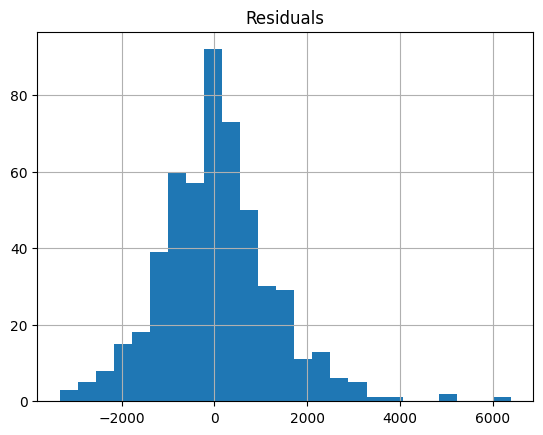

In [ ]:
car_lm_pred = car_lm.predict(valid_X)
all_residuals = valid_y - car_lm_pred

# Determine the percentage of datapoints with a residual in [-1307, 1307]
print(len(all_residuals[(all_residuals > -1307) & (all_residuals < 1307)]) / len(all_residuals))

pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
# save the plot
# plt.savefig("/content/drive/MyDrive/Colab Notebooks/histValidErr.jpg", dpi=600)

plt.show()

### Residual Histogram & 75% Threshold Interpretation

The histogram below shows the distribution of **residuals** (errors) from the validation set, where residual = actual price − predicted price.

- The distribution is centered around **0**, showing that most predictions are fairly accurate.
- The plot is **slightly right-skewed**, indicating some underestimations, but overall well-behaved.
- We calculated the threshold value of **±1307**, which captures approximately **74.95%** of the residuals.

### Business Interpretation

The model predicts car resale prices with **about 75% of predictions falling within ±\$1,307** of the actual price. This level of accuracy is considered **strong for pricing strategies**, offering good reliability for most listings.

The remaining ~25% of predictions with larger errors may represent **unusual cars, mispriced listings, or outlier behavior** — these are areas to investigate or flag for further review.



Estimates of regression coefficients are likely to be unstable due to multicollinearity in models with many variables.

It can be shown that using predictors that are uncorrelated with the outcome variable increases the variance of predictions.

It can be shown that dropping predictors that are actually correlated with the outcome variable can increase the average error (bias) of predictions.

This type of bias–variance trade-off is a basic aspect of most data mining procedures for prediction and classification.

In light of this, methods for reducing the number of predictors p to a smaller set are often used.

# Bias–Variance Trade-off
# Low Bias => more complex more features HIGH variance => Danger Overfitting
# High Bias => less complex less features LOW variance => Danger Underfitting
# In both overfit or underfit the total error will be high.
# utlimate and best point is the point that error will be in the lowest.

# Best way to find the best number of features (best subset) is Exhaustive search.
## but also we have: backward search - forward search - stepwise search.

# Exhaustive Search
The idea here is to evaluate all subsets of predictors. Since the number of subsets for even moderate values of p is very large, after the algorithm creates the subsets and runs all the models, we need some way to examine the most promising subsets and to select from them. The challenge is to select a model that is not too simplistic in terms of excluding important parameters (the model is under-fit), nor overly complex thereby modeling random noise (the model is over-fit).

# in the following code for FORWARD search comes

In [ ]:
# The initial model is the constant model - this requires special handling

# Train model and score model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)
print(best_variables)


Variables: Age_08_04, KM, HP, Met_Color, Automatic, cc, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=14684.39, constant
Step: score=13484.03, add Age_08_04
Step: score=13393.46, add KM
Step: score=13285.51, add Weight
Step: score=13205.43, add Fuel_Type_Petrol
Step: score=13188.97, add Quarterly_Tax
Step: score=13187.64, add Fuel_Type_Diesel
Step: score=13185.32, add HP
Step: score=13154.64, add cc
Step: score=13151.75, add Doors
Step: score=13151.75, add None
['Age_08_04', 'KM', 'Weight', 'Fuel_Type_Petrol', 'Quarterly_Tax', 'Fuel_Type_Diesel', 'HP', 'cc', 'Doors']


# compares Linear Regression, Random Forest, Gradient Boosting, and KNN Regressor

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Quarterly_Tax', 'Weight']

outcome = 'Price'  # adjust to your actual target column


# Separate features
categorical_features = ['Fuel_Type']
numeric_features = [col for col in predictors if col not in categorical_features]

# Define preprocessing for numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ]
)

# Define models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=1),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5)
}

# Prepare data
X = car_cleaned[predictors]
y = car_cleaned[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Compare models
for name, reg in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', reg)
    ])
    pipe.fit(train_X, train_y)

    train_preds = pipe.predict(train_X)
    valid_preds = pipe.predict(valid_X)

    print(f"\n{name}")
    print(f"R² (Train): {r2_score(train_y, train_preds):.4f}")
    print(f"RMSE (Train): {np.sqrt(mean_squared_error(train_y, train_preds)):.2f}")
    print(f"R² (Validation): {r2_score(valid_y, valid_preds):.4f}")
    print(f"RMSE (Validation): {np.sqrt(mean_squared_error(valid_y, valid_preds)):.2f}")


Linear Regression
R² (Train): 0.8640
RMSE (Train): 1116.73
R² (Validation): 0.8515
RMSE (Validation): 1223.98

Random Forest
R² (Train): 0.9838
RMSE (Train): 385.86
R² (Validation): 0.8798
RMSE (Validation): 1101.27

Gradient Boosting
R² (Train): 0.9363
RMSE (Train): 764.21
R² (Validation): 0.8891
RMSE (Validation): 1057.50

KNN Regressor
R² (Train): 0.9094
RMSE (Train): 911.37
R² (Validation): 0.8266
RMSE (Validation): 1322.28
